<a href="https://colab.research.google.com/github/advait-srivastava/Financial-Libraries-in-python/blob/main/Stock_Price_Predictor_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# Define ticker and period
ticker = "ZOMATO.NS"
trading_days = 252

# Calculate start date (buffer included)
end_date = datetime.today()
start_date = end_date - timedelta(days=int(trading_days * 1.5))  # weekends and holidays

# Download stock data
data = yf.download(ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))

# Keep only the last 252 rows (trading days)
data = data.tail(252)

# Save to CSV
data.to_csv("zomato.csv")
print("CSV saved as zomato.csv")
files.download('zomato.csv')

/tmp/ipython-input-2-3013456829.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))
ERROR:yfinance:HTTP Error 404: 
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ZOMATO.NS']: YFTzMissingError('possibly delisted; no timezone found')


CSV saved as zomato.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving zomato.csv to zomato (3).csv


In [ ]:
df = pd.read_csv('zomato.csv')
print(df.head())

         Date    Open    High     Low   Close   Volume   Symbol
0  2025-06-20  249.50  254.15  249.01  253.33  8540000  ETERNAL
1  2025-06-19  252.80  256.25  248.90  250.45  9120000  ETERNAL
2  2025-06-18  255.20  258.40  251.75  252.15  8890000  ETERNAL
3  2025-06-17  258.75  262.30  254.80  256.90  7650000  ETERNAL
4  2025-06-14  260.45  264.85  257.20  259.70  8320000  ETERNAL


Total rows in dataset: 258
 Dropping non-numeric columns: ['Symbol']
Training data shapes:
X_train shape: (174, 5)
Y_train shape: (174,)
X_test shape: (59, 5)
Y_test shape: (59,)

📊 Linear Regression Performance:
R² Score: 0.977269045666736
RMSE: 9.599525945203444

📊 Decision Tree Performance:
R² Score: 0.9659456572872304
RMSE: 11.74971150024472

📊 Random Forest Performance:
R² Score: 0.9816955806501431
RMSE: 8.614278936348683


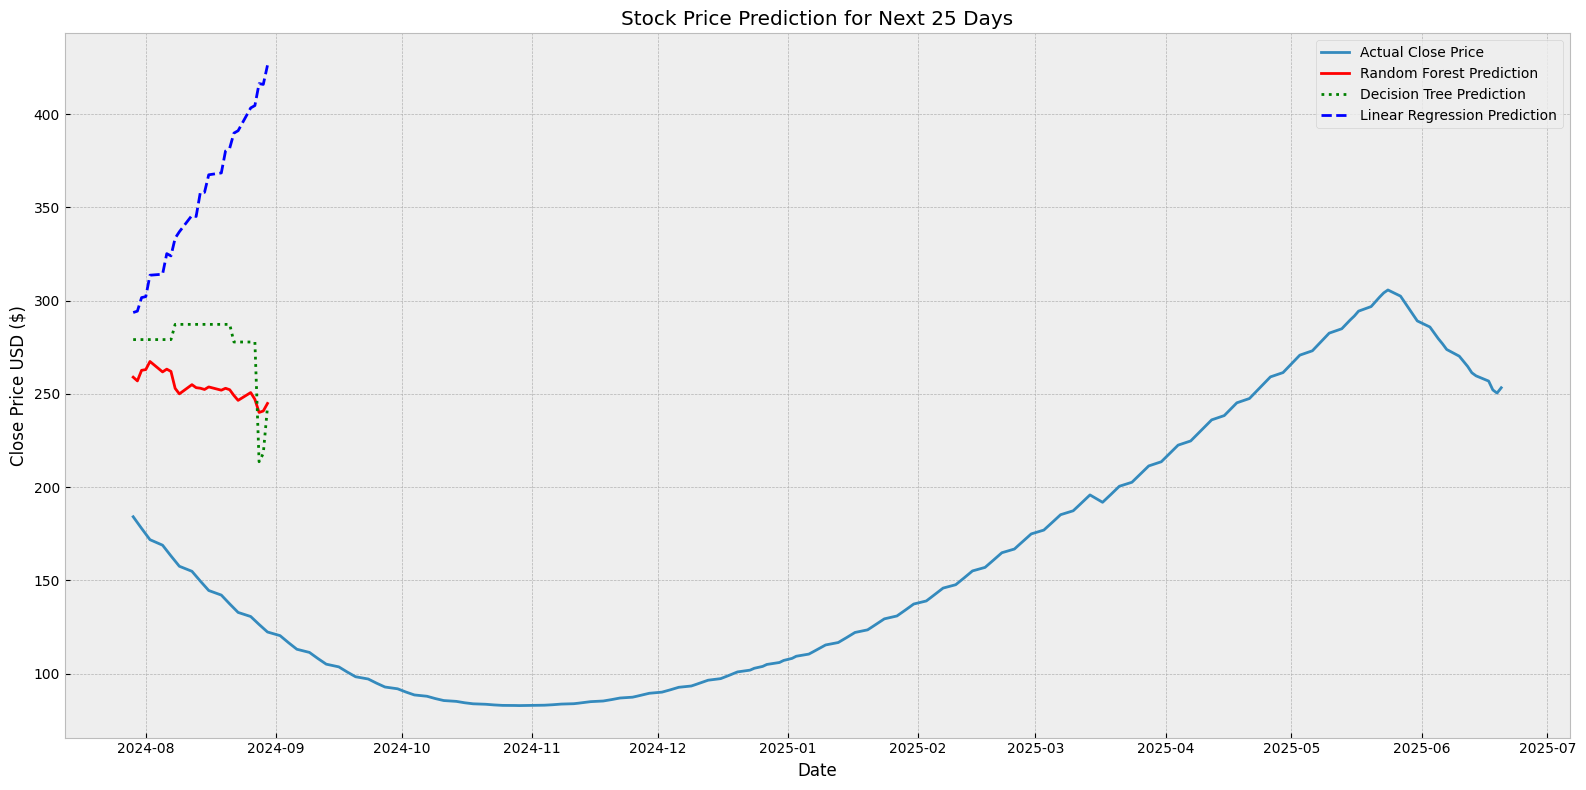

Future Predictions:
         Date  LR Prediction  DT Prediction  RF Prediction
0  2024-07-29     293.653705         279.15       258.9930
1  2024-07-30     294.404876         279.15       256.9915
2  2024-07-31     301.659121         279.15       262.6615
3  2024-08-01     302.184539         279.15       263.0675
4  2024-08-02     313.668892         279.15       267.3990
5  2024-08-05     314.196614         279.15       261.8150
6  2024-08-06     325.228591         279.15       263.2910
7  2024-08-07     324.030833         279.15       262.0655
8  2024-08-08     333.519203         287.30       252.9870
9  2024-08-09     336.961484         287.30       250.0350
10 2024-08-12     345.724670         287.30       254.9790
11 2024-08-13     345.168072         287.30       253.3555
12 2024-08-14     358.116617         287.30       253.0685
13 2024-08-15     358.107938         287.30       252.3965
14 2024-08-16     367.512284         287.30       253.7615
15 2024-08-19     368.506206        

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Plotting style
plt.style.use('bmh')

# Load data
df = pd.read_csv('zomato.csv')

# Keep all data including 'ETERNAL'
print(f"Total rows in dataset: {len(df)}")

# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.set_index('Date', inplace=True)

# Drop rows with any missing values
df.dropna(inplace=True)

# Predicting 25 days into the future
future_days = 25
df['prediction'] = df[['Close']].shift(-future_days)

# Prepare features and labels
x_df = df.drop(['prediction'], axis=1)

# Drop non-numeric columns like 'Symbol'
non_numeric_cols = x_df.select_dtypes(exclude=np.number).columns.tolist()
if non_numeric_cols:
    print(f" Dropping non-numeric columns: {non_numeric_cols}")
    x_df = x_df.drop(columns=non_numeric_cols)

# Feature and target arrays
x = x_df.values[:-future_days]
y = df['prediction'].values[:-future_days]

# Train-test split
if len(x) == 0 or len(y) == 0:
    print("Error: Not enough data after cleaning.")
else:
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.25, random_state=42
    )

    print("Training data shapes:")
    print("X_train shape:", x_train.shape)
    print("Y_train shape:", y_train.shape)
    print("X_test shape:", x_test.shape)
    print("Y_test shape:", y_test.shape)

    # ======= Train Models =======
    lr = LinearRegression().fit(x_train, y_train)
    dt = DecisionTreeRegressor().fit(x_train, y_train)
    rf = RandomForestRegressor().fit(x_train, y_train)

    # ======= Evaluate Models =======
    models = {'Linear Regression': lr, 'Decision Tree': dt, 'Random Forest': rf}

    for name, model in models.items():
        predictions = model.predict(x_test)
        print(f"\n📊 {name} Performance:")
        print("R² Score:", r2_score(y_test, predictions))
        print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))

    # ======= Predict Future =======
    x_future_df = df.drop(['prediction'], axis=1)[-future_days:]
    if non_numeric_cols:
        x_future_df = x_future_df.drop(columns=non_numeric_cols)

    if x_future_df.shape[1] != x_train.shape[1]:
        print("Feature mismatch between training and future data.")
    else:
        x_future = x_future_df.values

        lr_prediction = lr.predict(x_future)
        dt_prediction = dt.predict(x_future)
        rf_prediction = rf.predict(x_future)

        # ======= Generate Future Dates =======
        last_date = df.index[-future_days]
        inferred_freq = df.index.freq if df.index.freq else 'B'
        future_dates = pd.date_range(
            start=last_date + pd.tseries.frequencies.to_offset(inferred_freq),
            periods=future_days, freq=inferred_freq
        )

        # ======= Plot Predictions =======
        plt.figure(figsize=(16, 8))
        plt.plot(df['Close'][:-future_days], label='Actual Close Price')

        plt.plot(future_dates, rf_prediction, label='Random Forest Prediction', color='red')
        plt.plot(future_dates, dt_prediction, label='Decision Tree Prediction', color='green', linestyle='dotted')
        plt.plot(future_dates, lr_prediction, label='Linear Regression Prediction', color='blue', linestyle='--')

        plt.title('Stock Price Prediction for Next 25 Days')
        plt.xlabel('Date')
        plt.ylabel('Close Price USD ($)')
        plt.legend()
        plt.tight_layout()
        plt.show()

        # ======= Print Predictions =======
        future_df = pd.DataFrame({
            'Date': future_dates,
            'LR Prediction': lr_prediction,
            'DT Prediction': dt_prediction,
            'RF Prediction': rf_prediction
        })
        print("Future Predictions:")
        print(future_df.head(25))
